# Download NHANES 2015
this is the same code as we used in NHANES 2015 initial.ipynb

In [29]:
import numpy as np
import pandas as pd
import requests
import tempfile
import os
import pyreadstat

#------------------------------------------------------
# 1. Loader that downloads any NHANES .xpt file safely
#------------------------------------------------------
def load_nhanes_xpt(file, year="2015"):
    url = f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{year}/DataFiles/{file}"

    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) "
            "AppleWebKit/537.36 (KHTML, like Gecko) "
            "Chrome/120.0 Safari/537.36"
        )
    }
    r = requests.get(url, headers=headers)
    r.raise_for_status()

    if b"<html" in r.content[:200].lower():
        preview = r.content[:500].decode(errors="ignore")
        raise ValueError(f"HTML returned instead of XPT:\n{url}\n\nPreview:\n{preview}")

    with tempfile.NamedTemporaryFile(suffix=".xpt", delete=False) as tmp:
        tmp.write(r.content)
        tmp_path = tmp.name

    try:
        df, meta = pyreadstat.read_xport(tmp_path)
    finally:
        os.remove(tmp_path)

    return df


nhanes_files = {
    "DEMO":      "DEMO_I.xpt",
    "HDL":       "HDL_I.xpt",
    "TCHOL":     "TCHOL_I.xpt",
    "TRIGLY":    "TRIGLY_I.xpt",
    "GLU":       "GLU_I.xpt",
    "INS":       "INS_I.xpt",
    "DPQ":       "DPQ_I.xpt",
    "SLQ":       "SLQ_I.xpt",
    "DR1TOT":    "DR1TOT_I.xpt",
    "DR1IFF":    "DR1IFF_I.xpt",  # <-- we will EXCLUDE this later
    "PAQ":       "PAQ_I.xpt",
    "BPX":       "BPX_I.xpt",
    "BIOPRO":    "BIOPRO_I.xpt",
    "ALB_CR":    "ALB_CR_I.xpt"
}


all_dfs = {}

for name, fname in nhanes_files.items():
    print(f"Downloading {name} ...")
    d = load_nhanes_xpt(fname, "2015")
    print(name, d.shape)
    all_dfs[name] = d

DEMO (9971, 47)
HDL (8021, 3)
TCHOL (8021, 3)
TRIGLY (3191, 6)
GLU (3191, 4)
INS (3191, 7)
DPQ (5735, 11)
SLQ (6327, 8)
DR1TOT (9544, 168)
DR1IFF (121481, 84)
PAQ (9255, 94)
BPX (9544, 21)
BIOPRO (6744, 38)
ALB_CR (8608, 8)


# Load other years 

In [39]:
import os
import requests
import pyreadstat
import pandas as pd

# ============================================================
# 1. CACHE DIRECTORY (prevents re-downloading)
# ============================================================
CACHE_DIR = "nhanes_cache"
os.makedirs(CACHE_DIR, exist_ok=True)


# ============================================================
# 2. Loader with caching + missing-file handling
# ============================================================
def load_nhanes_xpt(filename, year):
    local_path = os.path.join(CACHE_DIR, f"{year}_{filename}")

    # If exists locally, use cached version
    if os.path.exists(local_path):
        print(f"Using cached: {local_path}")
        df, meta = pyreadstat.read_xport(local_path)
        return df

    # Otherwise download
    url = f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{year}/DataFiles/{filename}"
    print(f"Downloading {url} ...")

    r = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    if r.status_code == 404:
        print(f"⚠ File NOT FOUND on server: {filename} for {year}")
        return None

    r.raise_for_status()

    # Save file to cache
    with open(local_path, "wb") as f:
        f.write(r.content)

    df, meta = pyreadstat.read_xport(local_path)
    return df


# ============================================================
# 3. File lists — CORRECTED for availability
# ============================================================

# 2011–2012 (code suffix "G")
# INS_G.xpt does NOT exist in this cycle
nhanes_files_2011 = {
    "DEMO":   "DEMO_G.xpt",
    "HDL":    "HDL_G.xpt",
    "TCHOL":  "TCHOL_G.xpt",
    "TRIGLY": "TRIGLY_G.xpt",
    "GLU":    "GLU_G.xpt",      # includes insulin variables
    "DPQ":    "DPQ_G.xpt",
    "SLQ":    "SLQ_G.xpt",
    "DR1TOT": "DR1TOT_G.xpt",
    "PAQ":    "PAQ_G.xpt",
    "BPX":    "BPX_G.xpt",
    "BIOPRO": "BIOPRO_G.xpt",
    "ALB_CR": "ALB_CR_G.xpt"
}

# 2013–2014 (code suffix "H")
nhanes_files_2013 = {
    "DEMO":   "DEMO_H.xpt",
    "HDL":    "HDL_H.xpt",
    "TCHOL":  "TCHOL_H.xpt",
    "TRIGLY": "TRIGLY_H.xpt",
    "GLU":    "GLU_H.xpt",
    "INS":    "INS_H.xpt",
    "DPQ":    "DPQ_H.xpt",
    "SLQ":    "SLQ_H.xpt",
    "DR1TOT": "DR1TOT_H.xpt",
    "PAQ":    "PAQ_H.xpt",
    "BPX":    "BPX_H.xpt",
    "BIOPRO": "BIOPRO_H.xpt",
    "ALB_CR": "ALB_CR_H.xpt"
}

# 2015–2016 is already loaded in your session
# ---------------------
# Load 2015–2016 cycle
# ---------------------
nhanes_files_2015 = {
    "DEMO":   "DEMO_I.xpt",
    "HDL":    "HDL_I.xpt",
    "TCHOL":  "TCHOL_I.xpt",
    "TRIGLY": "TRIGLY_I.xpt",
    "GLU":    "GLU_I.xpt",
    "INS":    "INS_I.xpt",
    "DPQ":    "DPQ_I.xpt",
    "SLQ":    "SLQ_I.xpt",
    "DR1TOT": "DR1TOT_I.xpt",
    "PAQ":    "PAQ_I.xpt",
    "BPX":    "BPX_I.xpt",
    "BIOPRO": "BIOPRO_I.xpt",
    "ALB_CR": "ALB_CR_I.xpt"
}

df_2015 = load_cycle(nhanes_files_2015, "2015")

# 2017–2018 (code suffix "J")
nhanes_files_2017 = {
    "DEMO":   "DEMO_J.xpt",
    "HDL":    "HDL_J.xpt",
    "TCHOL":  "TCHOL_J.xpt",
    "TRIGLY": "TRIGLY_J.xpt",
    "GLU":    "GLU_J.xpt",
    "INS":    "INS_J.xpt",
    "DPQ":    "DPQ_J.xpt",
    "SLQ":    "SLQ_J.xpt",
    "DR1TOT": "DR1TOT_J.xpt",
    "PAQ":    "PAQ_J.xpt",
    "BPX":    "BPX_J.xpt",
    "BIOPRO": "BIOPRO_J.xpt",
    "ALB_CR": "ALB_CR_J.xpt"
}

# All cycles with correct YEAR KEY
all_cycles = {
    "2011": nhanes_files_2011,
    "2013": nhanes_files_2013,
    "2017": nhanes_files_2017
}


# ============================================================
# 4. Cycle loader (skips missing files)
# ============================================================
def load_cycle(files, cycle_year):
    dfs = []

    for name, fname in files.items():
        print(f"Loading {fname} for {cycle_year} ...")
        d = load_nhanes_xpt(fname, cycle_year)

        if d is None:
            print(f"⚠ Skipping missing file: {fname}")
            continue

        dfs.append(d)

    if len(dfs) == 0:
        print(f"⚠ No usable files for cycle {cycle_year}")
        return None

    # Merge all files within a cycle
    merged = dfs[0]
    for d in dfs[1:]:
        merged = merged.merge(d, on="SEQN", how="outer")

    merged["CYCLE"] = cycle_year
    return merged


# ============================================================
# 5. RUN MERGE
# ============================================================
merged_cycles = []

for cycle, files in all_cycles.items():
    print(f"\n======================")
    print(f"   Loading cycle {cycle}")
    print(f"======================\n")

    df_c = load_cycle(files, cycle)
    if df_c is not None:
        merged_cycles.append(df_c)

# Add already-loaded 2015 dataset
df_2015["CYCLE"] = "2015"
merged_cycles.append(df_2015)

# Final combined dataset
df_all = pd.concat(merged_cycles, ignore_index=True)

print("\nFINAL MERGED SHAPE:", df_all.shape)





Loading DEMO_I.xpt for 2015 ...
Loading HDL_I.xpt for 2015 ...
Loading TCHOL_I.xpt for 2015 ...
Loading TRIGLY_I.xpt for 2015 ...
Loading GLU_I.xpt for 2015 ...
Loading INS_I.xpt for 2015 ...
Loading DPQ_I.xpt for 2015 ...
Loading SLQ_I.xpt for 2015 ...
Loading DR1TOT_I.xpt for 2015 ...
Loading PAQ_I.xpt for 2015 ...
Loading BPX_I.xpt for 2015 ...
Loading BIOPRO_I.xpt for 2015 ...
Loading ALB_CR_I.xpt for 2015 ...

   Loading cycle 2011

Loading DEMO_G.xpt for 2011 ...
Using cached: nhanes_cache/2011_DEMO_G.xpt
Loading HDL_G.xpt for 2011 ...
Using cached: nhanes_cache/2011_HDL_G.xpt
Loading TCHOL_G.xpt for 2011 ...
Using cached: nhanes_cache/2011_TCHOL_G.xpt
Loading TRIGLY_G.xpt for 2011 ...
Using cached: nhanes_cache/2011_TRIGLY_G.xpt
Loading GLU_G.xpt for 2011 ...
Using cached: nhanes_cache/2011_GLU_G.xpt
Loading DPQ_G.xpt for 2011 ...
Using cached: nhanes_cache/2011_DPQ_G.xpt
Loading SLQ_G.xpt for 2011 ...
Using cached: nhanes_cache/2011_SLQ_G.xpt
Loading DR1TOT_G.xpt for 2011 ...
U

In [40]:
df_all.to_csv("nhanes_2011_2018_merged.csv", index=False)

# harmonization code / standardized NHANES pipeline

## standardize demographic variables

In [41]:
def harmonize_demographics(df):
    out = df.copy()

    # Age
    out["age"] = out.get("RIDAGEYR")
    
    # Sex
    out["sex"] = out["RIAGENDR"].map({1: "Male", 2: "Female"})
    
    # Race/ethnicity (RIDRETH1 exists 2011–2018)
    race_map = {
        1: "Mexican American",
        2: "Other Hispanic",
        3: "White",
        4: "Black",
        5: "Other/Multi"
    }
    out["race_ethnicity"] = out["RIDRETH1"].map(race_map)

    # Poverty-income ratio
    out["pir"] = out.get("INDFMPIR")

    return out


## standardize lipid variables

In [42]:
def harmonize_lipids(df):
    out = df.copy()

    # HDL
    out["hdl"] = out["LBDHDD"] if "LBDHDD" in out.columns else out["LBDHDDSI"]

    # Total Cholesterol
    out["tc"] = out["LBXTC"] if "LBXTC" in out.columns else out["LBDTCSI"]

    # Triglycerides
    out["tg"] = out["LBXTR"] if "LBXTR" in out.columns else out["LBDTRSI"]

    # LDL (if measured)
    if "LBDLDL" in out.columns:
        out["ldl"] = out["LBDLDL"]
    elif "LBDLDLSI" in out.columns:
        out["ldl"] = out["LBDLDLSI"]
    else:
        out["ldl"] = None

    # ApoB estimate using Martin equation (common)
    out["apob_est"] = 0.65 * out["ldl"]

    return out


## standardize metabolic variables

In [43]:
def harmonize_metabolic(df):
    out = df.copy()

    # fasting glucose
    out["glucose"] = out["LBXGLU"] if "LBXGLU" in out.columns else out["LBDGLUSI"]

    # fasting insulin
    ins_cols = ["LBXINS", "LBDINSI", "LBDINLC"]
    for c in ins_cols:
        if c in out.columns:
            out["insulin"] = out[c]
            break

    # HOMA-IR
    out["homa_ir"] = (out["glucose"] * out["insulin"]) / 405

    return out


## blood pressure - clean and average

In [44]:
def harmonize_bp(df):
    out = df.copy()

    sbp_cols = [c for c in out.columns if c.startswith("BPXSY")]
    dbp_cols = [c for c in out.columns if c.startswith("BPXDI")]

    out["sbp"] = out[sbp_cols].mean(axis=1)
    out["dbp"] = out[dbp_cols].mean(axis=1)
    out["pulse_pressure"] = out["sbp"] - out["dbp"]

    return out


## renal 

In [45]:
def harmonize_renal(df):
    out = df.copy()

    # serum creatinine
    creat_cols = ["LBXSCR", "LBDSSCR", "serum_creatinine", "LBDSCRSI"]
    for c in creat_cols:
        if c in out.columns:
            out["creat_mg_dl"] = out[c]
            break

    # CKD-EPI 2021
    import numpy as np

    creat = out["creat_mg_dl"]
    age = out["age"]
    female = (out["sex"] == "Female").astype(int)
    male = 1 - female

    out["egfr"] = (
        142
        * np.minimum(creat/0.7, 1)**(-0.241*female - 0.302*male)
        * np.maximum(creat/0.7, 1)**(-1.200*female - 1.200*male)
        * (0.9938**age)
    )

    # Albumin/creatinine ratio
    if "URXUMA" in out.columns and "URXUCR" in out.columns:
        out["acr"] = out["URXUMA"] / out["URXUCR"]

    return out


## diet RPDQS

In [46]:
def harmonize_diet(df):
    out = df.copy()

    # RPDQS variables you computed already
    if "rpdqs_total" in out:
        out["rpdqs"] = out["rpdqs_total"]
        out["rpdqs_norm"] = out["rpdqs_normalized"]

    # HEI groups you derived earlier
    hei_groups = [
        "whole_grains", "refined_grains", "nuts_seeds", "legumes",
        "low_fat_dairy", "fish", "red_meat", "processed_meat",
        "other_fruit", "citrus_melons_berries", "dark_green_veg",
        "other_veg", "ssb", "fried_foods"
    ]
    for feat in hei_groups:
        if feat not in out.columns:
            out[feat] = None

    return out


## sleep

In [47]:
def harmonize_sleep(df):
    out = df.copy()

    if "SLD012" in out:
        out["sleep_hours"] = out["SLD012"]

    if "SLQ310" in out:
        out["sleep_trouble"] = out["SLQ310"]

    return out


## mental health

In [48]:
def harmonize_phq(df):
    out = df.copy()

    phq_items = [f"DPQ0{i}0" for i in range(1, 10)]
    vals = out[phq_items] if all(col in out.columns for col in phq_items) else None

    if vals is not None:
        out["phq9"] = vals.sum(axis=1)

    return out


## physical activity

In [49]:
def harmonize_pa(df):
    out = df.copy()

    # simple: walking or moderate activity days
    out["pa_walk"] = out.get("PAQ710")
    out["pa_mod"]  = out.get("PAQ715")

    return out


## bring everything together

In [50]:
def prepare_nhanes(df):
    df2 = df.copy()
    df2 = harmonize_demographics(df2)
    df2 = harmonize_lipids(df2)
    df2 = harmonize_metabolic(df2)
    df2 = harmonize_bp(df2)
    df2 = harmonize_renal(df2)
    df2 = harmonize_diet(df2)
    df2 = harmonize_sleep(df2)
    df2 = harmonize_phq(df2)
    df2 = harmonize_pa(df2)

    return df2


# apply pipeline to entire 40k person data set

In [51]:
df_standardized = prepare_nhanes(df_all)
df_standardized.shape


(39156, 476)

# build system level variable dictionary

In [53]:
physio_systems = {

    # ------------------------------------------------------
    # CARDIOMETABOLIC SYSTEMS
    # ------------------------------------------------------

    "Lipids": [
        "hdl",
        "ldl",
        "tc",
        "tg",
        "apob_est"
    ],

    "Metabolic": [
        "glucose",
        "insulin",
        "homa_ir"
    ],

    "Blood_Pressure": [
        "sbp",
        "dbp",
        "pulse_pressure"
    ],

    "Renal": [
        "egfr",
        "acr",
        "creat_mg_dl"
    ],


    # ------------------------------------------------------
    # DIETARY SYSTEMS
    # ------------------------------------------------------

    # Your HEI-like food groups from the harmonized pipeline
    "Food_Groups_HEI": [
        "whole_grains",
        "refined_grains",
        "nuts_seeds",
        "legumes",
        "low_fat_dairy",
        "fish",
        "red_meat",
        "processed_meat",
        "dark_green_veg",
        "other_veg",
        "citrus_melons_berries",
        "other_fruit",
        "ssb",
        "fried_foods"
    ],

    # Your RPDQS variables
    "Diet_Quality_Indices": [
        "rpdqs",
        "rpdqs_norm"
    ],


    # ------------------------------------------------------
    # LIFESTYLE & MENTAL HEALTH
    # ------------------------------------------------------

    "Sleep": [
        "sleep_hours",
        "sleep_trouble"
    ],

    "Mental_Health": [
        "phq9"
    ],

    "Physical_Activity": [
        "pa_walk",
        "pa_mod"
    ],


    # ------------------------------------------------------
    # MICRONUTRIENTS & MACRONUTRIENTS
    # (only if present in your merged df_all)
    # ------------------------------------------------------

    "Macronutrients": [
        "DR1TPROT",     # protein
        "DR1TCARB",     # carbs
        "DR1TTFAT",     # total fat
        "DR1TSFAT",     # saturated fat
        "DR1TMFAT",     # monounsaturated fat
        "DR1TPFAT"      # polyunsaturated fat
    ],

    "Micronutrients": [
        "DR1TIRON",     # iron
        "DR1TBCAR",     # beta-carotene
        "DR1TVB12",     # B12
        "DR1TVC",       # vitamin C
        "DR1TVD",       # vitamin D
        "DR1TMAGN",     # magnesium
        "DR1TSODI",     # sodium
        "DR1TPOTA"      # potassium
    ],


    # ------------------------------------------------------
    # DEMOGRAPHICS
    # ------------------------------------------------------

    "Demographics": [
        "age",
        "sex",
        "race_ethnicity",
        "pir"
    ]
}


# full pipeline to build visualization 

## imports

In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import GraphicalLassoCV
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


## helper: prepare numeric analysis matrix & system scores

In [55]:
def build_system_ggm_matrix(df_all, physio_systems, min_nonmissing=0.7):
    """
    1) Runs your prepare_nhanes() harmonization
    2) Encodes demographics for GGM
    3) Selects variables from physio_systems
    4) Filters by missingness
    5) Standardizes (z-scores)
    6) Builds system-level scores (mean z per system)
    """

    # ----------------------------------------
    # 1. Harmonize raw NHANES
    # ----------------------------------------
    df_std = prepare_nhanes(df_all).copy()

    # ----------------------------------------
    # 2. Encode demographics numerically
    # ----------------------------------------
    # sex → 0/1
    if "sex" in df_std.columns:
        df_std["sex_female"] = (df_std["sex"] == "Female").astype(float)
    else:
        df_std["sex_female"] = np.nan

    # Poverty-income ratio is already numeric: "pir"
    # Age is "age"

    # For GGM, we avoid race dummies for now (simpler):
    # Use just age, pir, and sex_female
    physio_systems_ggm = physio_systems.copy()
    physio_systems_ggm["Demographics"] = ["age", "pir", "sex_female"]

    # ----------------------------------------
    # 3. Collect all variables used in systems
    # ----------------------------------------
    all_vars = sorted({
        v for vars_ in physio_systems_ggm.values() for v in vars_
    })

    # Keep only vars present
    all_vars_present = [v for v in all_vars if v in df_std.columns]
    df_sub = df_std[all_vars_present]

    # Keep only numeric columns
    df_num = df_sub.select_dtypes(include="number")

    # ----------------------------------------
    # 4. Filter by % non-missing
    # ----------------------------------------
    keep_cols = [
        c for c in df_num.columns
        if df_num[c].notna().mean() >= min_nonmissing
    ]
    df_num = df_num[keep_cols]

    # Drop rows with any remaining NaNs
    df_num = df_num.dropna(axis=0, how="any")

    # ----------------------------------------
    # 5. Standardize (z-scores)
    # ----------------------------------------
    scaler = StandardScaler()
    X_z = scaler.fit_transform(df_num.values)
    df_z = pd.DataFrame(X_z, columns=df_num.columns, index=df_num.index)

    # ----------------------------------------
    # 6. Build system-level scores (mean z per system)
    # ----------------------------------------
    df_sys = pd.DataFrame(index=df_z.index)

    system_vars_used = {}

    for system, vars_ in physio_systems_ggm.items():
        vars_present = [v for v in vars_ if v in df_z.columns]
        if len(vars_present) == 0:
            continue
        df_sys[system] = df_z[vars_present].mean(axis=1)
        system_vars_used[system] = vars_present

    return df_sys, system_vars_used


## graphical lasso and partial correlations

In [56]:
def fit_system_ggm(df_sys):
    """
    Fits GraphicalLassoCV to system scores and
    returns the partial correlation matrix + fitted model.
    """
    X = df_sys.values
    model = GraphicalLassoCV(alphas=10, cv=5).fit(X)

    precision = model.precision_
    d = np.sqrt(np.diag(precision))
    partial = -precision / np.outer(d, d)
    np.fill_diagonal(partial, 0.0)  # zero out diagonal

    return partial, model


## networkX graph from partial correlations

In [57]:
def build_system_graph(system_names, partial_matrix, edge_threshold=0.10):
    """
    Builds an undirected graph where nodes = systems
    and edges = partial correlations with |r| >= edge_threshold.
    """
    G = nx.Graph()
    n = len(system_names)

    for name in system_names:
        G.add_node(name)

    for i in range(n):
        for j in range(i + 1, n):
            w = partial_matrix[i, j]
            if np.abs(w) >= edge_threshold:
                G.add_edge(system_names[i], system_names[j], weight=float(w))

    return G


## system level GGM plot

System variables actually used per system:
  Lipids              : 2 vars -> ['hdl', 'tc']
  Blood_Pressure      : 3 vars -> ['sbp', 'dbp', 'pulse_pressure']
  Renal               : 1 vars -> ['acr']
  Mental_Health       : 1 vars -> ['phq9']
  Physical_Activity   : 2 vars -> ['pa_walk', 'pa_mod']
  Macronutrients      : 6 vars -> ['DR1TPROT', 'DR1TCARB', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT']
  Micronutrients      : 8 vars -> ['DR1TIRON', 'DR1TBCAR', 'DR1TVB12', 'DR1TVC', 'DR1TVD', 'DR1TMAGN', 'DR1TSODI', 'DR1TPOTA']
  Demographics        : 3 vars -> ['age', 'pir', 'sex_female']


/var/folders/qp/44xx9pgd1_7c2_fs4jl3hf4h0000gn/T/ipykernel_94324/137304695.py:58: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(
/var/folders/qp/44xx9pgd1_7c2_fs4jl3hf4h0000gn/T/ipykernel_94324/137304695.py:68: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


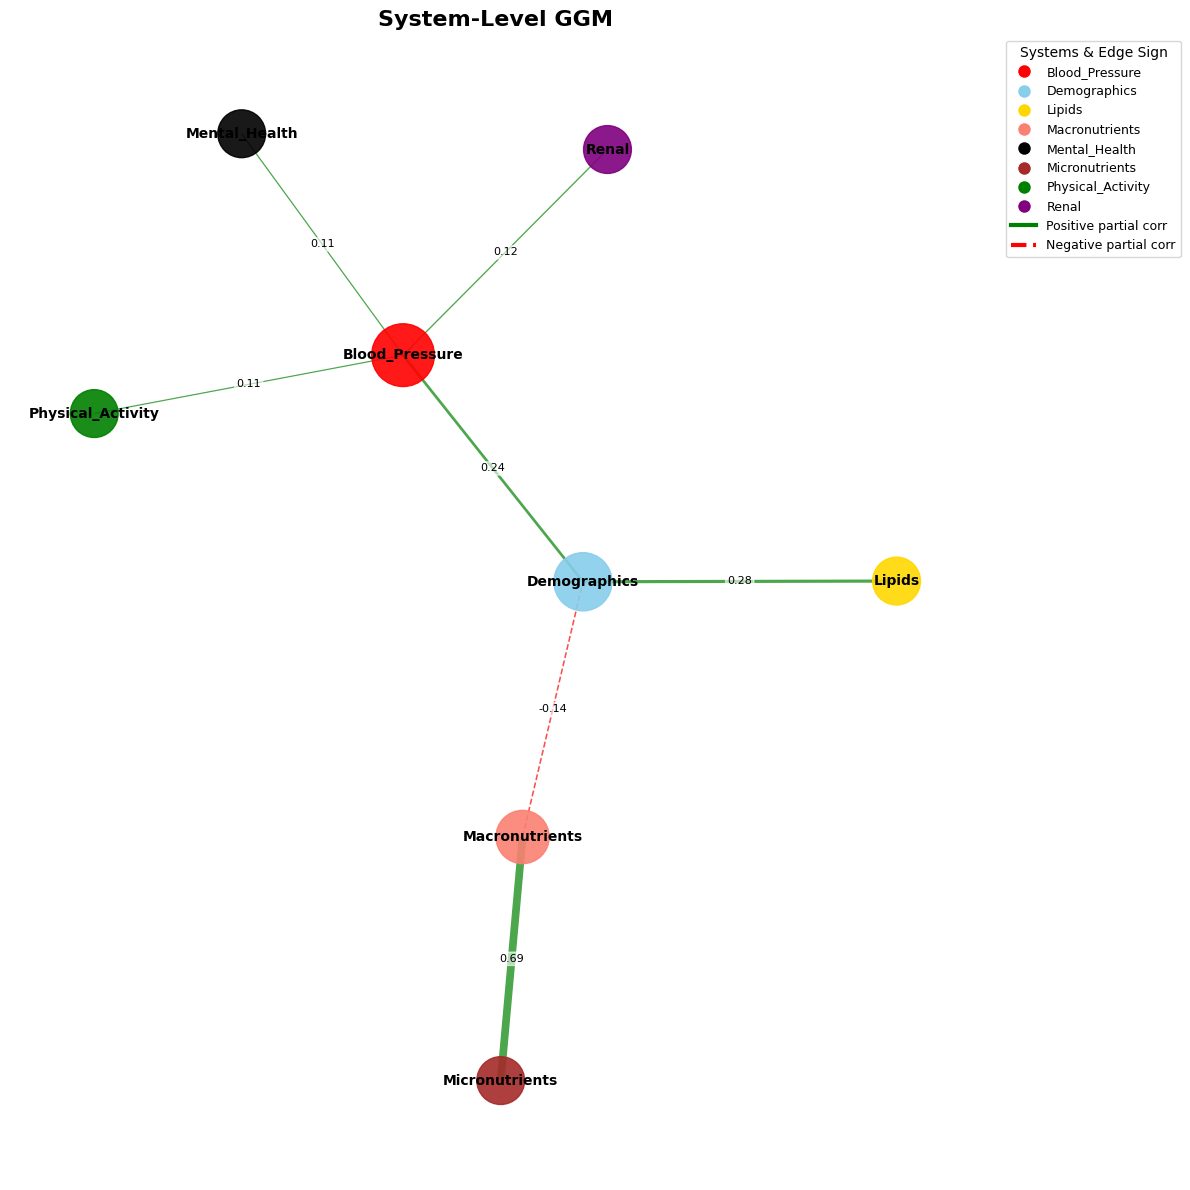

/var/folders/qp/44xx9pgd1_7c2_fs4jl3hf4h0000gn/T/ipykernel_94324/3414131080.py:125: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


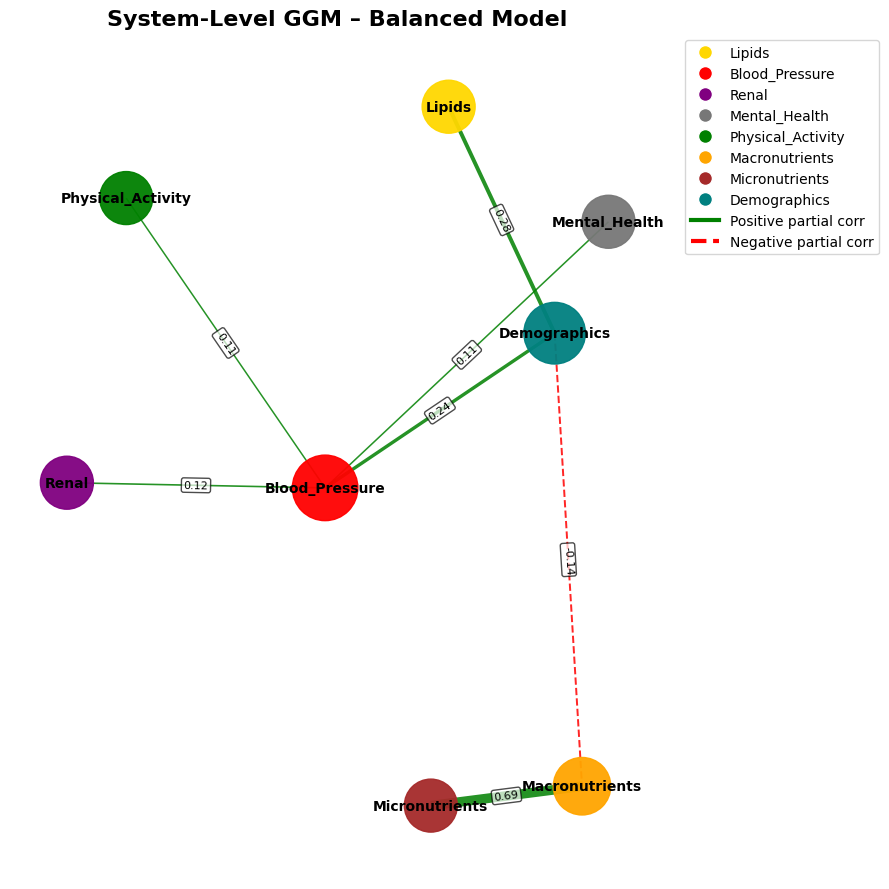

In [76]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.lines import Line2D

# ----------------------------------------
# 1. DEFINE SYSTEM COLOR MAP FIRST
# ----------------------------------------
system_color_map = {
    "Lipids": "gold",
    "Blood_Pressure": "red",
    "Renal": "purple",
    "Mental_Health": "#777777",     # changed
    "Physical_Activity": "green",
    "Macronutrients": "orange",
    "Micronutrients": "brown",
    "Demographics": "teal"
}

# ----------------------------------------
# 2. RUN THE SYSTEM GGM PIPELINE (if not already done)
# ----------------------------------------
df_sys, partial_mat, G_ggm, ggm_model = run_system_ggm_pipeline(
    df_all,
    physio_systems,
    min_nonmissing=0.7,
    edge_threshold=0.10,
    title="System-Level GGM"
)

# ----------------------------------------
# 3. DRAW THE NETWORK USING THE COLOR MAP
# ----------------------------------------
fig, ax = draw_system_ggm(
    G_ggm,
    title="System-Level GGM – Balanced Model",
    color_map=system_color_map,
    edge_threshold=0.10
)

# ----------------------------------------
# 4. SAVE THE FIGURE IF YOU WANT
# ----------------------------------------
fig.savefig("system_level_ggm_balanced.png", dpi=300, bbox_inches="tight")


def draw_system_ggm(
    G,
    pos=None,
    title="System-Level Gaussian Graphical Model",
    color_map=None,
    edge_threshold=0.10,
    figsize=(9, 9)
):
    """
    Draw a clean, centered, publication-quality GGM network plot.
    Returns (fig, ax) so caller can save fig.
    """

    # --------------------------------------------------------------
    # 1. Filter edges by threshold
    # --------------------------------------------------------------
    G_plot = nx.Graph()
    for u, v, d in G.edges(data=True):
        weight = d.get("weight", 0)
        if abs(weight) >= edge_threshold:
            G_plot.add_edge(u, v, weight=weight)

    # --------------------------------------------------------------
    # 2. Layout (default: auto-centered spring)
    # --------------------------------------------------------------
    if pos is None:
        pos = nx.spring_layout(G_plot, seed=42, k=1.0)  # stable, centered

    # --------------------------------------------------------------
    # 3. Node colors
    # --------------------------------------------------------------
    node_colors = []
    for n in G_plot.nodes():
        if color_map and n in color_map:
            node_colors.append(color_map[n])
        else:
            node_colors.append("gray")

    # --------------------------------------------------------------
    # 4. Node sizes (degree centrality)
    # --------------------------------------------------------------
    centrality = nx.degree_centrality(G_plot)
    node_sizes = [1200 + 1800 * centrality[n] for n in G_plot.nodes()]

    # --------------------------------------------------------------
    # 5. Edge styles
    # --------------------------------------------------------------
    edge_colors = []
    edge_widths = []
    edge_styles = []

    for u, v, d in G_plot.edges(data=True):
        weight = d["weight"]
        edge_colors.append("green" if weight > 0 else "red")
        edge_widths.append(abs(weight) * 10)
        edge_styles.append("solid" if weight > 0 else "dashed")

    # --------------------------------------------------------------
    # 6. Draw figure
    # --------------------------------------------------------------
    fig, ax = plt.subplots(figsize=figsize)

    # nodes
    nx.draw_networkx_nodes(
        G_plot, pos,
        node_color=node_colors,
        node_size=node_sizes,
        alpha=0.95,
        ax=ax
    )

    # edges: draw positive and negative separately for proper styling
    for style in ["solid", "dashed"]:
        edges_to_draw = [
            (u, v)
            for (u, v, d), es in zip(G_plot.edges(data=True), edge_styles)
            if es == style
        ]
        if edges_to_draw:
            nx.draw_networkx_edges(
                G_plot, pos,
                edgelist=edges_to_draw,
                width=[w for w, es in zip(edge_widths, edge_styles) if es == style],
                edge_color=[c for c, es in zip(edge_colors, edge_styles) if es == style],
                style=style,
                connectionstyle="arc3,rad=0.12",
                alpha=0.85,
                ax=ax
            )

    # labels
    nx.draw_networkx_labels(
        G_plot, pos,
        font_size=10,
        font_weight="bold",
        ax=ax
    )

    # edge labels
    edge_label_dict = {
        (u, v): f"{d['weight']:.2f}"
        for u, v, d in G_plot.edges(data=True)
    }
    nx.draw_networkx_edge_labels(
        G_plot, pos,
        edge_labels=edge_label_dict,
        font_size=8,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7),
        ax=ax
    )

    # --------------------------------------------------------------
    # 7. Legend
    # --------------------------------------------------------------
    legend_elements = []

    if color_map:
        for name, color in color_map.items():
            legend_elements.append(
                Line2D([0], [0], marker='o', color='w',
                       markerfacecolor=color, label=name, markersize=10)
            )

    legend_elements += [
        Line2D([0], [0], color='green', lw=3, label='Positive partial corr'),
        Line2D([0], [0], color='red',   lw=3, label='Negative partial corr', linestyle="dashed"),
    ]

    ax.legend(
        handles=legend_elements,
        loc="upper left",
        bbox_to_anchor=(1.02, 1.0),
        frameon=True
    )

    # --------------------------------------------------------------
    # 8. Final formatting
    # --------------------------------------------------------------
    ax.set_title(title, fontsize=16, weight="bold")
    ax.axis("off")
    fig.tight_layout()

    return fig, ax



## convenience wrapper for pipeline

In [77]:
def run_system_ggm_pipeline(df_all, physio_systems,
                            min_nonmissing=0.7,
                            edge_threshold=0.10,
                            title="System-level GGM (NHANES 2011–2018)"):

    # Build system scores
    df_sys, system_vars_used = build_system_ggm_matrix(
        df_all,
        physio_systems,
        min_nonmissing=min_nonmissing
    )

    print("System variables actually used per system:")
    for sys_name, vars_ in system_vars_used.items():
        print(f"  {sys_name:20s}: {len(vars_)} vars -> {vars_}")

    # Fit GGM
    partial, model = fit_system_ggm(df_sys)

    # Build graph
    system_names = list(df_sys.columns)
    G = build_system_graph(system_names, partial, edge_threshold=edge_threshold)

    # Plot
    plot_system_ggm(G, title=title)

    return df_sys, partial, G, model


## run it in complete data set

/var/folders/qp/44xx9pgd1_7c2_fs4jl3hf4h0000gn/T/ipykernel_94324/3414131080.py:125: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


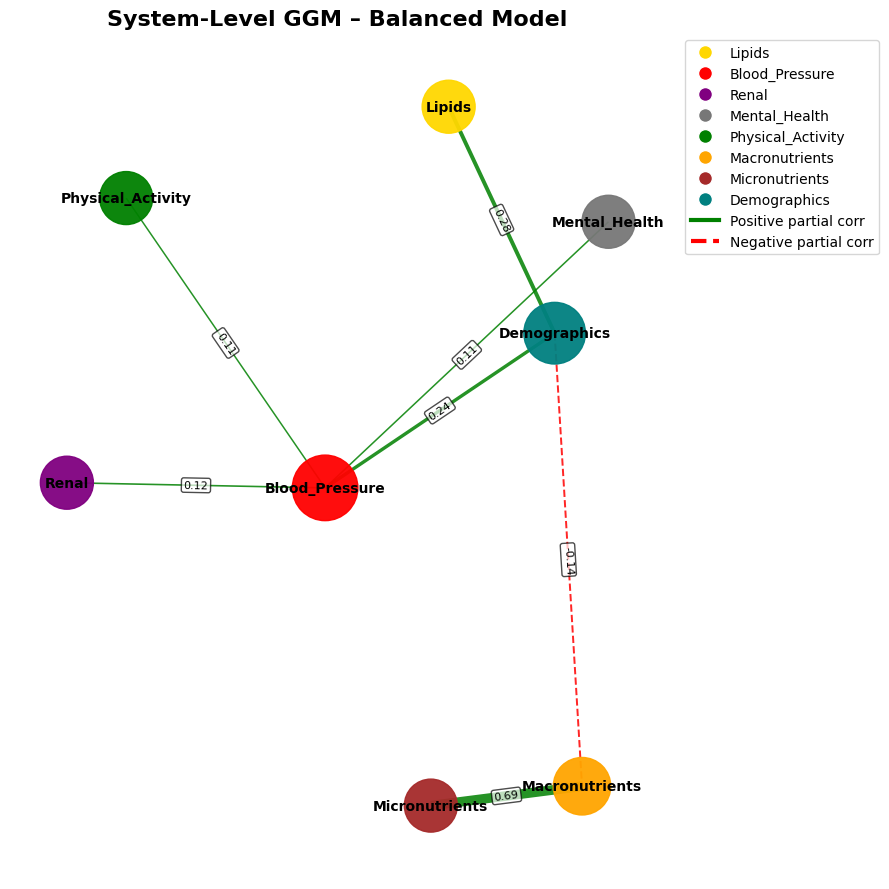

In [78]:
fig, ax = draw_system_ggm(
    G_ggm,
    title="System-Level GGM – Balanced Model",
    color_map=system_color_map,   # your color dictionary
    edge_threshold=0.10
)

plt.savefig("system level.png", dpi=300, bbox_inches="tight")

In [68]:
list(G_ggm.nodes())


['Lipids',
 'Blood_Pressure',
 'Renal',
 'Mental_Health',
 'Physical_Activity',
 'Macronutrients',
 'Micronutrients',
 'Demographics']

In [69]:
list(system_color_map.keys())


NameError: name 'system_color_map' is not defined